In [1]:
import numpy as np  
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
%ls 'datasets/'

 adult.csv                   Cartwheeldata.csv          movies.csv
 airline_data.csv            census.csv                 nhanes_2015_2016.csv
 antropometria00.csv         cwurData.csv               pokemon.csv
 antropometria-dataset.csv   data.csv                   sample_pivot.csv
 Canada.xlsx                'Diabetes by Country.csv'   tips.csv
 cancer_cervical.csv         headbrain.csv              weight-height.csv


Aquí indique que abriera mi archivo de Diabetes by country y le puse df.info() para poder ver las variables que no iban a ser relevantes para mi analísis

In [3]:
df=pd.read_csv('datasets/Diabetes by Country.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 74 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  10 non-null     object 
 1   region        10 non-null     object 
 2   Image URL     10 non-null     object 
 3   1990          10 non-null     float64
 4   1991          0 non-null      float64
 5   1992          0 non-null      float64
 6   1993          0 non-null      float64
 7   1994          0 non-null      float64
 8   1995          0 non-null      float64
 9   1996          0 non-null      float64
 10  1997          0 non-null      float64
 11  1998          0 non-null      float64
 12  1999          0 non-null      float64
 13  2000          10 non-null     float64
 14  2001          0 non-null      float64
 15  2002          0 non-null      float64
 16  2003          0 non-null      float64
 17  2004          0 non-null      float64
 18  2005          0 non-null      

# Preguntas guía 
1. ¿Cúales son los 4 países con más casos de diabetes?
2. ¿Cúal son los casos de diabetes en los diferentes países en los años 1990 al 2030?
3. ¿Cúal es la distribución por decadas de los 4 países más afectados?
4. ¿Cuál es la distribución de los casos de diabetes por cada país en las diferentes decadas?

# Limpieza de datos
Primero limpiare mis datos con df.drop para solo quedarme con las variables críticas que son las que quiero utilizar

In [4]:
df.drop(['Image URL', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67','Unnamed: 68',
        'Unnamed: 69','Unnamed: 70','Unnamed: 71','Unnamed: 72','Unnamed: 73'], axis=1, inplace=True)


Renombrar Variables, Definir las etiquetas de mis columnas como str, establecí el indice,el total, defini la variable años y el rango de años con los que voy a trabajar
 

In [5]:
df.rename(columns={'Country Name':'Country'}, inplace=True)
df.columns = list(map(str, df.columns))
df.set_index('Country', inplace=True)
df['Total'] = df.iloc[:, 3:].sum(axis=1)
años = list(map(str, range(1990, 2030)))

Utilize groupby para combinar mis países en la variable df_Country 

In [6]:
df_Country = df.groupby('Country', 
                           axis=0).sum()
print(type(df.groupby('Country', 
                      axis=0
                     )))




<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


#  1. ¿Cuales son los 4 países con más casos de diabetes?

Realice un pie plot para poder contestar a mi primera pregunta, indicando que quiero el tipo pie, el tamaño (5,6),y el porcentaje 

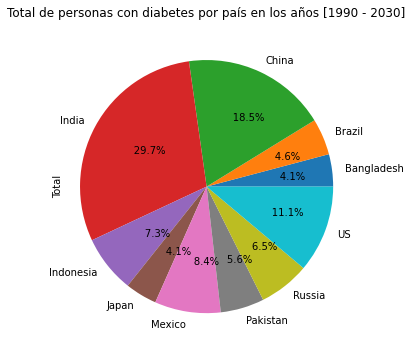

In [7]:

df_Country['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%10.1f%%', 
                                 
                            
                            )

plt.title('Total de personas con diabetes por país en los años [1990 - 2030]')
plt.axis('equal') 

plt.show()

# Respuesta a pregunta 1
Con este pie chart puedo contestar a mi primer pregunta guía indicando que los países con más casos de diabetes son India,China,Estados Unidos y México. También me puedo dar cuenta que mis variables críticas son estos países debido a que tienen el mayor porcentaje entonces son las que utilizare para responder mis siguientes preguntas. 

Despues establecí un nuevo dataframe llamado df_criticos en donde solo incluí mis variables críticas para contestar las demas preguntas

In [8]:
df_criticos= df.loc[['India', 'China','US','Mexico'], años].transpose()
df_criticos.head(1)

Country,India,China,US,Mexico
1990,10000000.0,7000000.0,5000000.0,4500000.0


Aquí también nos podemos dar cuenta que el orden de los países más críticos es primero India después China después Estados Unidos y por último México.

# 2. ¿Cúales son los casos de diabetes en los diferentes países en los años 1990 al 2030?

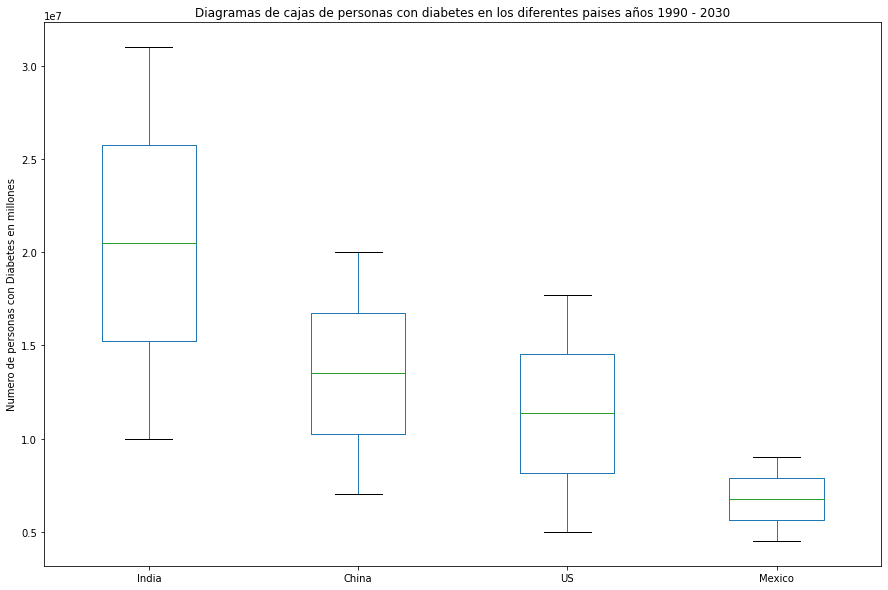

In [9]:
df_criticos.plot(kind='box', figsize=(15, 10))

plt.title('Diagramas de cajas de personas con diabetes en los diferentes paises años 1990 - 2030')
plt.ylabel('Numero de personas con Diabetes en millones')

plt.show()

# Respuesta a pregunta 2
Nosotros podemos observar dentro de diágramas de cajas los casos que se tiene de diabetes en cada uno de los diferentes países en millones. También podemos observar en que cuartil se centran la mayoría de los datos y la mediana de cada uno de ellos. En este caso no tenemos datos átipicos (outliers). En india los casos van desde 1 millón hasta por encima de los 3 millones, por otra parte en China van desde alrededor de 0.7 millones hasta 2 millones, en Estados Unidos van desde  alrededor de 0.4 millones hasta 1.7millones y en méxico de 0.3 millones hasta 0.7 millones. 

Aqui nuevamente hice un data frame de mis 4 países críticos para organizar los datos en orden descendiente.

In [10]:
df_top4 = df.sort_values(['Total'], 
                          ascending=False, 
                          axis=0
                         ).head(4) 


Aquí cree listas para establecer las diferentes decadas que voy a analizar las cuales son 90s, 00s y 30s y las agregue a sus respectivas variables y establecí los rangos.

In [11]:
años_90s = list(map(str, range(1990, 2000))) 
años_00s = list(map(str, range(2000, 2010))) 
años_30s = list(map(str, range(2030, 2040))) 



Aquí estableci una serie para cada decada dividiendo mi dataframe y sume  todos los años para cada país.


In [12]:
df_90s = df_top4.loc[:, años_90s].sum(axis=1) 
df_00s = df_top4.loc[:, años_00s].sum(axis=1) 
df_30s = df_top4.loc[:, años_30s].sum(axis=1)



Aquí fusione mis tres decadas  en un nuevo data frame que llame decadas_df

In [13]:
decadas_df = pd.DataFrame({'1990s': df_90s, 
                       '2000s': df_00s, 
                       '2030s':df_30s
                      }
                     ) 


# 3.¿Cúal es la distribución por decadas de los 4 países más afectados por diabetes?

Aquí lo que hice fue generar un box plot de diabetes en las diferentes decadas, 90s,00s y 30s para poder responder a mi pregunta 3. 

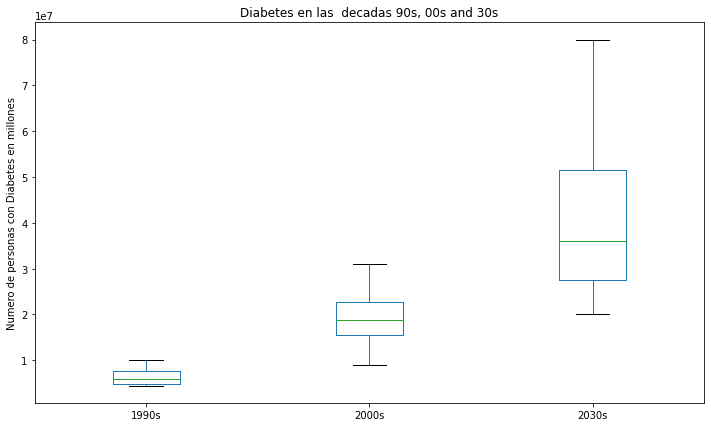

In [14]:
decadas_df.plot(kind='box', 
            figsize=(12, 7))

plt.title('Diabetes en las  decadas 90s, 00s and 30s')
plt.ylabel('Numero de personas con Diabetes en millones')

plt.show()

# Respuesta a pregunta 3
Aquí nuevamente podemos visualizar a traves de mis diagramas de cajas la distribución de los países en conjunto de las diferentes decadas, podemos ver que en la decada 90s los datos están por debajo del millón desde alrededor de 0.3 millones hasta 1.2 millones, por otra parte en los 00s los datos estan arriba de 1 millon y por debajo de 3.2 millones y en la decada 30s estan entre 2.5 y hasta 7 millones. También podemos observar los diferentes quartiles, el rango y la media en cada una de las decadas. Podemos notar una tendencia de que los países en conjunto cada decada tienen un mayor valor en los casos de diabetes.

# 4.¿Cuál es la distribución de los casos de diabetes por cada país en las diferentes decadas?


Hare un line plot para poder identificar el comportamiento de los países en cada una de las decadas

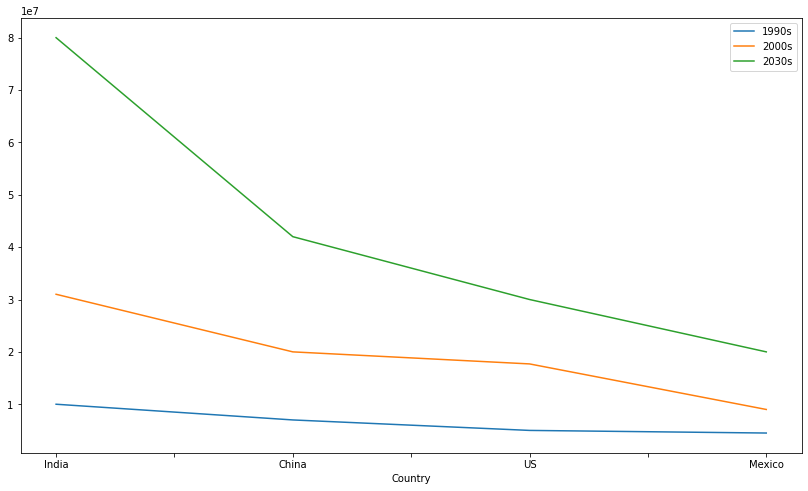

In [15]:
decadas_df.plot(kind='line', 
            figsize=(14, 8))

plt.title('')

plt.show()



# Respuesta a pregunta 4
En este diágrama de línea podemos observar los datos en cada país y por cada decada. La decada de los 90s esta presentada con el color azul, la decada de los 00s esta representada con el color naranja y la decada de los 30s esta representada con el color verde. Podemos ver que en los 3 casos se observa un incremento en casos por decada lo cual es alarmante por que significa que hay una tendencia a ir subiendo por cada respectiva decada por país.